In [1]:
from IPython.display import display, clear_output
from glob import glob
from local_helper import * # local package

In [2]:
FOLDER_PATH = "datasets/"
files = glob(f'{FOLDER_PATH}*')
file = files[1]

FILE_NAME = file.split('/')[-1]
FILE_PATH = file

In [3]:
from ctypes import *

so_file = "./c/c_code.so"
c_code  = CDLL(so_file)

# spectral() function
c_code.spectral.argstype = [c_int, c_int, POINTER(c_char), c_int, c_int]
c_code.spectral.restype  = POINTER(c_float)

# kmeans() function
c_code.kmeans.argstype = [c_int, c_int, POINTER(c_char), c_size_t]
c_code.kmeans.restype  = POINTER(c_float)

# free_floatPP() function
c_code.free_floatP.argtypes = [POINTER(c_float)]
c_code.free_floatP.restype  = None

In [4]:
path = FILE_PATH.encode('utf-8')
read_rows = fileDepth(FILE_PATH)
data_len  = fileWidth(FILE_PATH)
knn = 20
k = 3
print(f"Depth: {read_rows} | Width: {data_len}")
# read_rows = 20

Depth: 200 | Width: 3


In [5]:
out = c_code.spectral(data_len, read_rows, path, knn, k)
l = lp_float_c_to_list_2d(out, read_rows)
c_code.free_floatP(out)
out = c_code.kmeans(data_len, read_rows, path, k)
m = lp_float_c_to_list_2d(out, read_rows)
c_code.free_floatP(out)


REQ_DATA_LEN: 3 	TRU_DATA_LEN: 3
REQ_N_ROWS  : 200 	TRU_N_ROWS  : 200+1

ORIGINAL DATASET: (x,y,target)
0	0.398811 0.408549 0.000000 
1	0.995555 0.971334 0.000000 
2	-0.330461 -0.415594 0.000000 
3	-0.460104 -0.432202 0.000000 
4	0.513715 0.599305 0.000000 
5	0.284140 0.242859 0.000000 
6	-0.827809 -0.795623 0.000000 
7	0.510067 0.602109 0.000000 
200x3 matrix. 8x3 printed.

k of clusters: 3

TRIMMED DATASET: (x,y)
0	0.398811 0.408549 
1	0.995555 0.971334 
2	-0.330461 -0.415594 
3	-0.460104 -0.432202 
4	0.513715 0.599305 
5	0.284140 0.242859 
6	-0.827809 -0.795623 
7	0.510067 0.602109 
200x2 matrix. 8x2 printed.

DISTANCES MATRIX:
0	0.000000 1.159529 1.553414 1.699666 0.305660 0.280361 2.430792 0.304816 
1	1.159529 0.000000 2.712943 2.859195 0.853869 1.439890 3.590321 0.854713 
2	1.553414 2.712943 0.000000 0.146251 1.859074 1.273053 0.877378 1.858230 
3	1.699666 2.859195 0.146251 0.000000 2.005326 1.419305 0.731127 2.004481 
4	0.305660 0.853869 1.859074 2.005326 0.000000 0.586021 2.73

In [6]:
all_dots = readCsv(FILE_PATH, read_rows)

cls = [int(dot[2]) for dot in all_dots]
cls_set = set(cls)
x = [dot[0] for dot in all_dots]
y = [dot[1] for dot in all_dots]

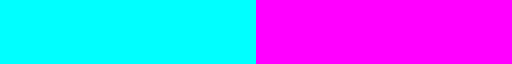

In [7]:
cool_resampled = mpl.colormaps['cool'].resampled(len(cls_set))
cool_resampled

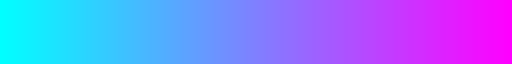

In [8]:
cool = mpl.colormaps['cool']
cool

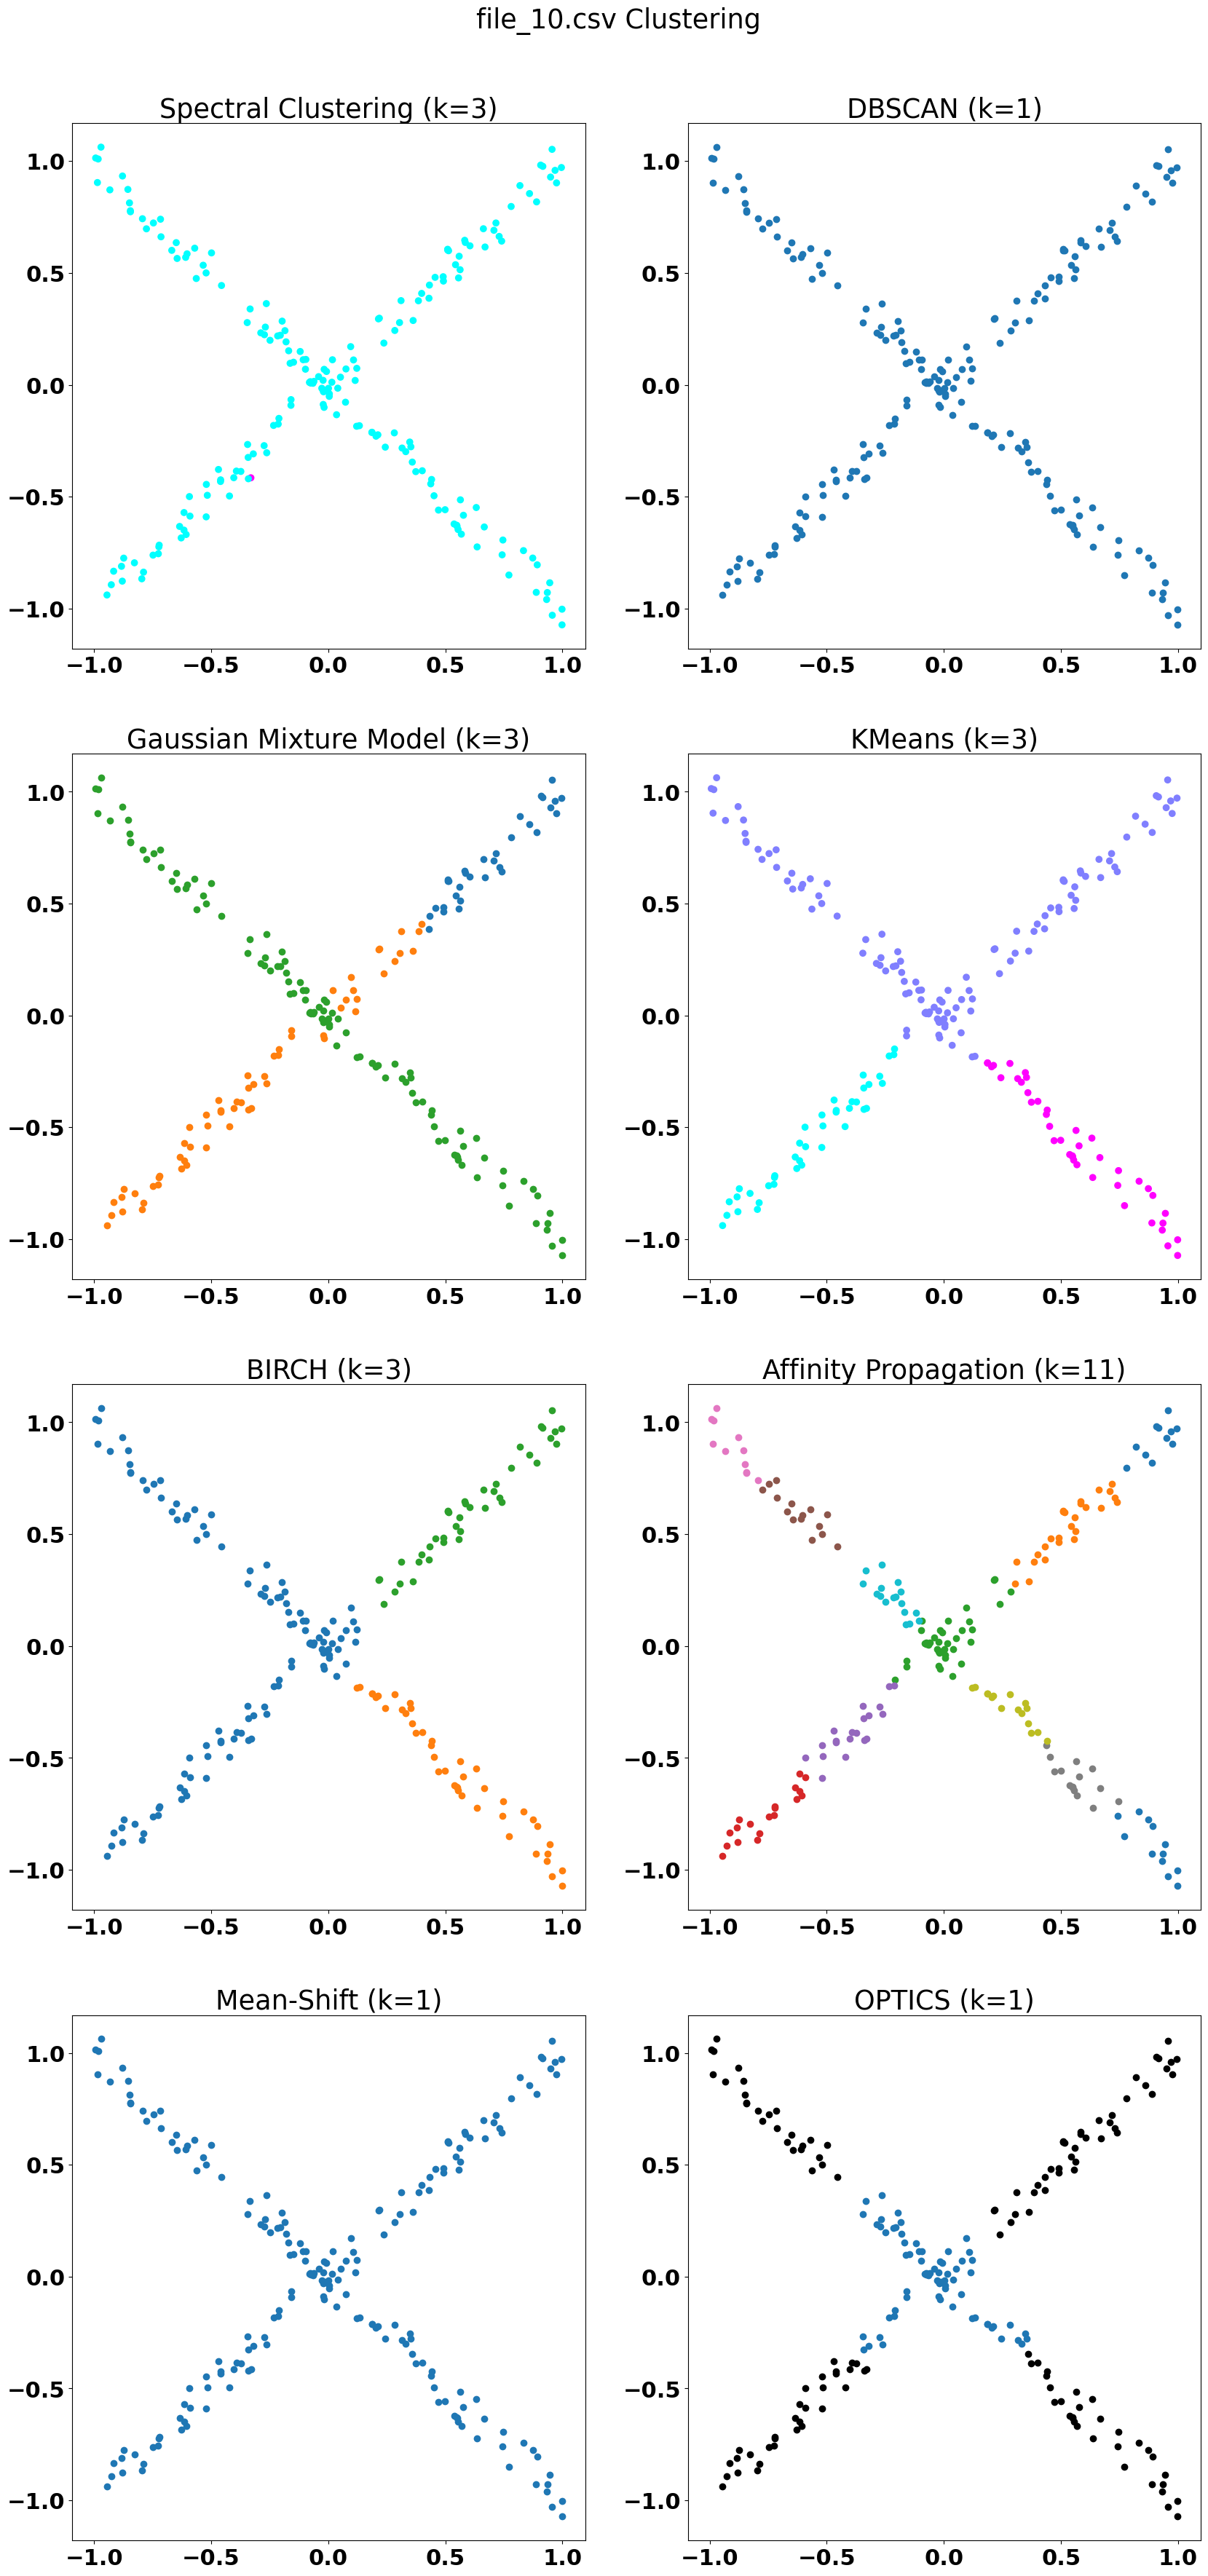

Dots colored black have no assigned cluster.


In [10]:
fig, axis = setupMPL(FILE_NAME, list(cls_set), cool_resampled)

l_spectral = l
plotSPECTRAL(fig, axis, 0,0, x,y, l_spectral, cool, f"Spectral Clustering (k={k})")

l_dbscan = dbscan(all_dots, eps=2.5, min_samples=knn) # no need for number of clusters (k)
k_dbscan = k_clusters(l_dbscan)
plotDBSCAN(fig, axis, 0,1, x,y, l_dbscan, all_dots, f"DBSCAN (k={k_dbscan})")

l_gaussian = gaussian(all_dots, k=k)
plotGaussian(fig, axis, 1,0, x,y, l_gaussian, all_dots, f"Gaussian Mixture Model (k={k})")

l_kmeans = m
plotKMEANS(fig, axis, 1,1, x,y, l_kmeans, cool, f"KMeans (k={k})")

l_birch = birch(all_dots, threshold=0.03, n=k)
plotBIRCH(fig, axis, 2,0, x,y, l_birch, all_dots, f"BIRCH (k={k})")

l_affinity = affinity(all_dots, 0.7) # no need for number of clusters (k)
k_affinity = k_clusters(l_affinity)
plotAffinity(fig, axis, 2,1, x,y, l_affinity, all_dots, f"Affinity Propagation (k={k_affinity})")

l_mean = mean(all_dots) # no need for number of clusters (k) | bad on large scale datasets
k_mean = k_clusters(l_mean)
plotMEAN(fig, axis, 3,0, x,y, l_mean, all_dots, f"Mean-Shift (k={k_mean})")

l_optics = optics(all_dots, eps=0.5, min_samples=25) # no need for number of clusters (k)
k_optics = k_clusters(l_optics)
plotOPTICS(fig, axis, 3,1, x,y, l_optics, all_dots, f"OPTICS (k={k_optics})")
plt.show()
print("Dots colored black have no assigned cluster.")